# This Notebook is just me having fun using pytorch to find the least squares fit of a circle fitting the data. I needed to solve the problem in my studies which I solved in a cooler method (see relevant matlab code). But here I just wanted to use python since it's a least squares problem

In [1]:
import torch
from torch import nn
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()

In [2]:
# Generate a dataset from a circle section with some noise
x0 = 3
y0 = 5
r0 = 2
theta = np.linspace(0,180,180)
y = np.sin(np.pi*theta/180)*r0+y0 + np.random.rand(180)/10-0.05
y = torch.FloatTensor(y)
x = np.cos(np.pi*theta/180)*r0+x0 + np.random.rand(180)/10-0.05
x = torch.FloatTensor(x)
target = torch.zeros(y.shape)  # We need a target to minimize the loss - so a vector of zeros

In [3]:
# Here we define our model which has thre parameters - the circle center and radius
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.r = nn.Parameter(torch.rand(1))
        self.xc = nn.Parameter(torch.rand(1))
        self.yc = nn.Parameter(torch.rand(1))
    
    def forward(self, x, y):
        return (x-self.xc)**2 + (y-self.yc)**2-self.r**2  # we return the square error of a point from the circle perimeter

In [4]:
regressor = Regressor()
loss = nn.L1Loss()  # we use L1 loss because the regressor already returns the square error
optim = torch.optim.SGD(regressor.parameters(), lr=0.01)

starting_params = [regressor.xc.data.item(), regressor.yc.data.item(), regressor.r.data.item()]

In [5]:
# optimize the problem 
for ii in range(500):
    optim.zero_grad()
    out = regressor(x,y)
    err = loss(out,target)
    err.backward()
    optim.step()
    print(err.data.item())
    if err.data.item()<0.1:
        break

41.3775634765625
39.79701232910156
38.277565002441406
36.81673812866211
35.41214370727539
34.06150436401367
32.76260757446289
31.513330459594727
30.311643600463867
29.155574798583984
28.04324722290039
26.972850799560547
25.942625045776367
24.950897216796875
23.99605369567871
23.07653045654297
22.190832138061523
21.337512969970703
20.51518440246582
19.722503662109375
18.958179473876953
18.220966339111328
17.50966453552246
16.823108673095703
16.16019058227539
15.51982593536377
14.900969505310059
14.302620887756348
13.723800659179688
13.163568496704102
12.621015548706055
12.095258712768555
11.58543872833252
11.090733528137207
10.610337257385254
10.143468856811523
9.689372062683105
9.247310638427734
8.816567420959473
8.396442413330078
7.986866474151611
7.59150505065918
7.207193851470947
6.838228225708008
6.483320236206055
6.145924091339111
5.82036018371582
5.510214805603027
5.2109694480896
4.922551155090332
4.651265621185303
4.389379978179932
4.1383233070373535
3.8967769145965576
3.6665952

In [6]:
print('Print The Circle Found:')
print('x center: {}, y center: {}, radius: {}'.format(regressor.xc.data.item(), regressor.yc.data.item(), regressor.r.data.item()))

Print The Circle Found:
x center: 3.0089752674102783, y center: 5.011916637420654, radius: 1.9912023544311523


Text(0.5, 1.0, 'Comparisson between exact circle, the generated data, and the regressed circle')

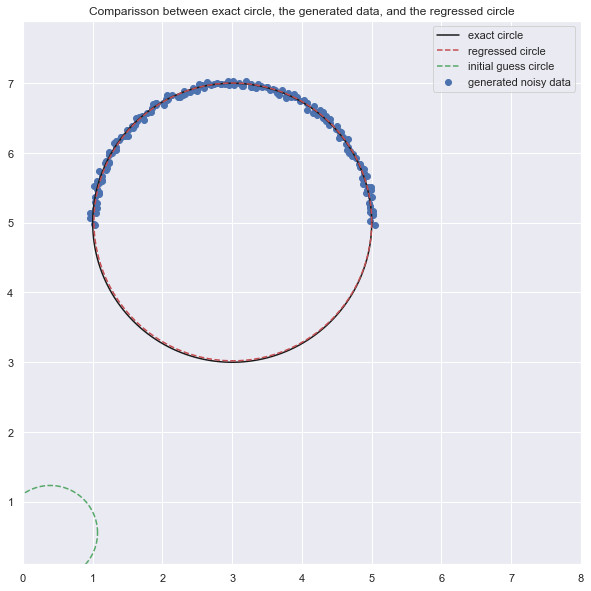

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,label='generated noisy data')
plt.plot(np.cos(np.pi*np.linspace(0,360,360)/180)*r0+x0,np.sin(np.pi*np.linspace(0,360,360)/180)*r0+y0,'k-',label='exact circle')
plt.plot(np.cos(np.pi*np.linspace(0,360,360)/180)*regressor.r.data.item()+regressor.xc.data.item()
         ,np.sin(np.pi*np.linspace(0,360,360)/180)*regressor.r.data.item()+regressor.yc.data.item(),'r--',label='regressed circle')
plt.plot(np.cos(np.pi*np.linspace(0,360,360)/180)*starting_params[2] +starting_params[0]
         ,np.sin(np.pi*np.linspace(0,360,360)/180)*starting_params[2] +starting_params[1],'g--',label='initial guess circle')
plt.axis('equal')
plt.xlim([0,8])
plt.ylim([0,8])
plt.legend()
plt.title('Comparisson between exact circle, the generated data, and the regressed circle')

# That was a fun little code snippet